# Análisis de la Evasión de Clientes en TelecomX

## Introducción

En un mercado cada vez más competitivo como el de las telecomunicaciones, la **retención de clientes** se ha vuelto un elemento clave para la sostenibilidad de las empresas. **TelecomX**, una compañía dedicada a ofrecer servicios de telefonía, internet y televisión, enfrenta uno de los retos más comunes del sector: la **evasión de clientes** (*churn*), es decir, la pérdida de usuarios que deciden cancelar sus servicios y migrar a la competencia.

La identificación temprana de patrones y factores asociados al abandono del servicio permite a las empresas anticiparse al comportamiento de los clientes y diseñar **estrategias efectivas de fidelización**. En este sentido, el presente proyecto de análisis de datos tiene como objetivo principal **analizar la evasión de clientes en TelecomX** a partir de datos históricos, con el fin de comprender qué variables influyen en la decisión de cancelar el servicio.

---

## Objetivos

### Objetivo general
Analizar los datos de clientes de TelecomX para identificar patrones de evasión y factores determinantes en la pérdida de clientes.

### Objetivos específicos
- Explorar y comprender la estructura del conjunto de datos disponible.
- Identificar características comunes entre los clientes que han abandonado el servicio.
- Visualizar tendencias y relaciones entre variables relevantes ( tipo de plan, servicio contratado, entre otros).
- Establecer recomendaciones preliminares basadas en los hallazgos del análisis.

---

## Descripción del conjunto de datos

El análisis se desarrollará a partir de un conjunto de datos proporcionado por TelecomX, el cual contiene información histórica de clientes, incluyendo variables como:

- `customerID`: número de identificación único de cada cliente
- `Churn`: si el cliente dejó o no la empresa
- `gender`: género (masculino y femenino)
- `SeniorCitizen`: información sobre si un cliente tiene o no una edad igual o mayor a 65 años
- `Partner`: si el cliente tiene o no una pareja
- `Dependents`: si el cliente tiene o no dependientes
- `tenure`: meses de contrato del cliente
- `PhoneService`: suscripción al servicio telefónico
- `MultipleLines`: suscripción a más de una línea telefónica
- `InternetService`: suscripción a un proveedor de internet
- `OnlineSecurity`: suscripción adicional de seguridad en línea
- `OnlineBackup`: suscripción adicional de respaldo en línea
- `DeviceProtection`: suscripción adicional de protección del dispositivo
- `TechSupport`: suscripción adicional de soporte técnico, menor tiempo de espera
- `StreamingTV`: suscripción de televisión por cable
- `StreamingMovies`: suscripción de streaming de películas
- `Contract`: tipo de contrato
- `PaperlessBilling`: si el cliente prefiere recibir la factura en línea
- `PaymentMethod`: forma de pago
- `Charges.Monthly`: total de todos los servicios del cliente por mes
- `Charges.Total`: total gastado por el cliente
- `daily_accounts`: total gastado por dia

Este dataset será la base para realizar un análisis exploratorio de datos (EDA), aplicar técnicas de visualización y obtener conclusiones significativas que puedan guiar la toma de decisiones estratégicas de la empresa.

---

Este estudio busca ofrecer una **visión clara y accionable** sobre el fenómeno de evasión en TelecomX, proporcionando información clave para mitigar su impacto y mejorar la retención de clientes a través de decisiones fundamentadas en datos.



## Extracción de datos
### Importación de librerias a utilizar


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots


### Leyendo la base de datos

In [6]:
data = pd.read_json('TelecomX_Data.json')
data.head(2)

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


### Normalizar la data anterior


In [7]:
# Selecccionar las columnas que contienen datos anidados
cols_to_normalize = ['customer', 'phone', 'internet', 'account']

# Eliminar las columnas anidadas del DataFrame original
df_base = data.drop(columns=cols_to_normalize)

# Normalizar cada columna anidada
normalized_parts = []
for col in cols_to_normalize:
    norm = pd.json_normalize(data[col])
    normalized_parts.append(norm)

# Concatenar el DataFrame base con las partes normalizadas
data = pd.concat([df_base] + normalized_parts, axis=1)

In [ ]:
data.head(5)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## Tansformación de datos

### Conocer el conjunto de datos

In [ ]:
print('el Dataframe tiene', data.shape[1], 'columnas y ', data.shape[0], 'filas')

el Dataframe tiene 21 columnas y  7267 filas


In [ ]:
print(f'Tipos de datos:\n{data.dtypes}')

Tipos de datos:
customerID           object
Churn                object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
Charges.Monthly     float64
Charges.Total        object
dtype: object


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


### Identificar incoherencia en los datos (nulos, duplicados, incosistencia, etc)

In [ ]:
print(f'Columnas con valores nulos:\n{data.isnull().sum()}')
print('\nCantidad de datos duplicados: ',data.duplicated().sum())

Columnas con valores nulos:
customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64

Cantidad de datos duplicados:  0


In [ ]:
data['Charges.Total'] =data['Charges.Total'].str.strip()

### Identificamos que valores de "Total gasto" no se pueden convertir  a float

In [ ]:
conversion = pd.to_numeric(data['Charges.Total'], errors='coerce')
valores_no_convertibles = data.loc[conversion.isna() & data['Charges.Total'].notna(), 'Charges.Total'].unique()
print("Valores en 'Charges.Total' que NO se pueden convertir a float:")
print(valores_no_convertibles)


Valores en 'Charges.Total' que NO se pueden convertir a float:
['']


### Convertir la columna  "Total gasto" a dato  flotante

In [ ]:
data['Charges.Total'] = data['Charges.Total'].replace('', '0'). replace(' ', '0')
data['Charges.Total'] = data['Charges.Total'].astype(np.float64)
data['Charges.Total'].fillna(0, inplace=True)

C:\Users\ysort\AppData\Local\Temp\ipykernel_8772\3381529340.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Charges.Total'].fillna(0, inplace=True)


### Identificar valores unicos de las variables categoricas yes/no

In [ ]:
data['Churn'].unique()
data['MultipleLines'].unique()
data['OnlineSecurity'].unique()
data['OnlineBackup'].unique()
data['DeviceProtection'].unique()
data['StreamingTV'].unique()
data['StreamingMovies'].unique()
data['TechSupport'].unique()

array(['Yes', 'No', 'No internet service'], dtype=object)

### modificar los valores de las columnas, para estandarizar a 'Yes' y 'No'


In [ ]:
data['Churn'].replace('', 'No', inplace=True)
data['MultipleLines'].replace('No phone service', 'No', inplace=True)
data['OnlineSecurity'].replace('No internet service', 'No', inplace=True)
data['OnlineBackup'].replace('No internet service', 'No', inplace=True)
data['DeviceProtection'].replace('No internet service', 'No', inplace=True)
data['StreamingTV'].replace('No internet service', 'No', inplace=True)
data['StreamingMovies'].replace('No internet service', 'No', inplace=True)
data['TechSupport'].replace('No internet service', 'No', inplace=True)

C:\Users\ysort\AppData\Local\Temp\ipykernel_8772\2238991397.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Churn'].replace('', 'No', inplace=True)
C:\Users\ysort\AppData\Local\Temp\ipykernel_8772\2238991397.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example,

In [ ]:
#Corroborar los cambios
print(data['Churn'].unique())
print(data['MultipleLines'].unique())
print(data['OnlineSecurity'].unique())
print(data['OnlineBackup'].unique())
print(data['DeviceProtection'].unique())
print(data['StreamingTV'].unique())
print(data['StreamingMovies'].unique())
print(data['TechSupport'].unique())

['No' 'Yes']
['No' 'Yes']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']
['No' 'Yes']
['Yes' 'No']


### Creamos una columna  de cuentas diarias

In [ ]:
data['daily_accounts']=(data['Charges.Monthly'] / 30).round(2)
data.head(2)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,daily_accounts
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4,2.00


### Estandarización y transformación de datos (opcional)

In [ ]:
# Identifico las columnas que contienen solo los valores 'Yes' y 'No'
columnas_binarias = [
    col for col in data.columns
    if set(data[col].dropna().unique()) <= {"Yes", "No"}
]
print("Columnas con solo 'Yes' y 'No':", columnas_binarias)

# Reemplazo los valores 'Yes' y 'No' por 1 y 0 respectivamente
data[columnas_binarias] = data[columnas_binarias].replace({'Yes': 1, 'No': 0})


C:\Users\ysort\AppData\Local\Temp\ipykernel_8772\3303603604.py:9: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data[columnas_binarias] = data[columnas_binarias].replace({'Yes': 1, 'No': 0})


Columnas con solo 'Yes' y 'No': ['Churn', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling']


In [ ]:
data.head(2)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,daily_accounts
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,2.00


## Carga y Análisis
### Análisis descriptivo(Estadistico)

In [ ]:
Columnas_estadisticas = ['tenure','Charges.Monthly','Charges.Total', 'daily_accounts']
data[Columnas_estadisticas].describe()

,tenure,Charges.Monthly,Charges.Total,daily_accounts
count,7267.000000,7267.000000,7267.000000,7267.000000
mean,32.346498,64.720098,2277.182035,2.157292
std,24.571773,30.129572,2268.648587,1.004407
min,0.000000,18.250000,0.000000,0.610000
25%,9.000000,35.425000,396.200000,1.180000
50%,29.000000,70.300000,1389.200000,2.340000
75%,55.000000,89.875000,3778.525000,2.995000
max,72.000000,118.750000,8684.800000,3.960000


In [ ]:
data.head(2)

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,daily_accounts
0,0002-ORFBO,0,Female,0,1,1,9,1,0,DSL,...,0,1,1,0,One year,1,Mailed check,65.6,593.3,2.19
1,0003-MKNFE,0,Male,0,0,0,9,1,1,DSL,...,0,0,0,1,Month-to-month,0,Mailed check,59.9,542.4,2.00


### Distribución de evasión

In [8]:
conteo =data['Churn'].value_counts()
porcentajes = round(data['Churn'].value_counts(normalize=True)*100,2)
print(conteo)
print(porcentajes)

Churn
No     5174
Yes    1869
        224
Name: count, dtype: int64
Churn
No     71.20
Yes    25.72
        3.08
Name: proportion, dtype: float64


/tmp/ipython-input-9-3771087037.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  barplot = sns.barplot(x='Churn', y='Count', data=churn_data, palette=['#66b3ff', '#ff9999'])


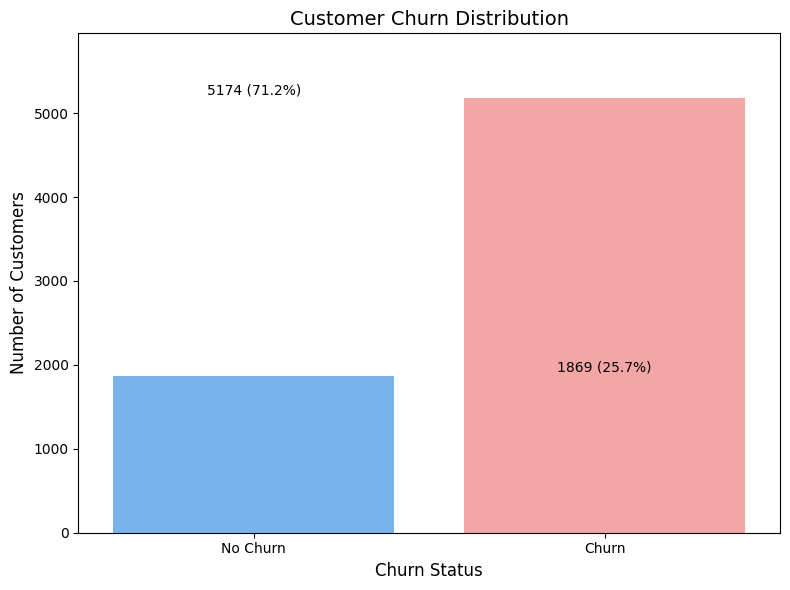

In [9]:
# Calculate churn counts and percentages, excluding empty strings
churn_counts = data['Churn'].value_counts().drop('')
churn_percentages = round(data['Churn'].value_counts(normalize=True).drop('') * 100, 2)

# Create a DataFrame for plotting
churn_data = pd.DataFrame({
    'Count': churn_counts,
    'Percentage': churn_percentages
}).reset_index()
churn_data.columns = ['Churn', 'Count', 'Percentage']

# Sort by Churn to ensure 'No' comes before 'Yes' for consistent plotting
churn_data = churn_data.sort_values('Churn', ascending=False)

# Create the bar chart
plt.figure(figsize=(8, 6))
barplot = sns.barplot(x='Churn', y='Count', data=churn_data, palette=['#66b3ff', '#ff9999'])

# Add titles and labels
plt.title('Customer Churn Distribution', fontsize=14)
plt.xlabel('Churn Status', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['No Churn', 'Churn'])

# Add count and percentage labels on top of bars
for index, row in churn_data.iterrows():
    barplot.text(
        index,
        row['Count'] + 50,  # Adjust vertical position
        f"{row['Count']} ({row['Percentage']:.1f}%)",
        color='black',
        ha="center"
    )

# Improve layout and display
plt.ylim(0, churn_data['Count'].max() * 1.15) # Adjust y-limit to make space for labels
plt.tight_layout()
plt.show()

## 1. Descripción del Problema

Se ha identificado una tasa de evasión de clientes del **25%** durante el último periodo analizado. Esto implica que **uno de cada cuatro clientes abandona el servicio o deja de comprar** en un ciclo determinado.

Esta cifra se considera **significativamente alta** en la mayoría de sectores, y en particular en el de las telecomunicaciones, donde la adquisición de nuevos clientes suele ser más costosa que la retención de los existentes. Una tasa de evasión del 25% puede tener un **impacto negativo considerable** en los ingresos, la rentabilidad y el crecimiento a largo plazo de TelecomX si no se aborda de manera efectiva. Mantener una tasa de evasión elevada requiere una inversión constante y sustancial en la adquisición de nuevos usuarios solo para mantener la base de clientes actual, sin generar un crecimiento real.

## Recuento de evasión por variables categóricas

In [12]:
# Calculate churn counts by gender
conteo_gender = data.groupby(['gender', 'Churn']).size().unstack(fill_value=0)

# Calculate churn counts by contract type
conteo_contract = data.groupby(['Contract', 'Churn']).size().unstack(fill_value=0)

# Calculate churn counts by payment method
conteo_payment = data.groupby(['PaymentMethod', 'Churn']).size().unstack(fill_value=0)

# Calculate churn counts by internet service type
conteo_internet = data.groupby(['InternetService', 'Churn']).size().unstack(fill_value=0)


# Print the churn counts for each categorical variable
print("Evasión por genero:")
print(conteo_gender)
print("\nEvasión por tipo de contrato:")
print(conteo_contract)
print("\nEvasión por metodo de pago:")
print(conteo_payment)
print("\nEvasión por tipo de servicio de internet:")
print(conteo_internet)

Evasión por genero:
Churn          No  Yes
gender                
Female  104  2549  939
Male    120  2625  930

Evasión por tipo de contrato:
Churn                  No   Yes
Contract                       
Month-to-month  130  2220  1655
One year         46  1307   166
Two year         48  1647    48

Evasión por metodo de pago:
Churn                            No   Yes
PaymentMethod                            
Bank transfer (automatic)  45  1286   258
Credit card (automatic)    46  1290   232
Electronic check           80  1294  1071
Mailed check               53  1304   308

Evasión por tipo de servicio de internet:
Churn                   No   Yes
InternetService                 
DSL               67  1962   459
Fiber optic      102  1799  1297
No                55  1413   113


In [14]:
def calculate_churn_rate(df, column):
    """Calculates churn rate for a given categorical column."""
    total_counts = df[column].value_counts()
    churn_counts = df[df['Churn'] == 1][column].value_counts()
    churn_rate = (churn_counts / total_counts).fillna(0).round(4) * 100
    churn_summary = pd.DataFrame({
        'Total': total_counts,
        'Churned': churn_counts.fillna(0),
        'Churn Rate (%)': churn_rate
    }).sort_index()
    return churn_summary

# Calculate and display churn rate for each categorical variable
print("Churn Rate by Gender:")
display(calculate_churn_rate(data, 'gender'))

print("\nChurn Rate by Contract Type:")
display(calculate_churn_rate(data, 'Contract'))

print("\nChurn Rate by Payment Method:")
display(calculate_churn_rate(data, 'PaymentMethod'))

print("\nChurn Rate by Internet Service Type:")
display(calculate_churn_rate(data, 'InternetService'))

Churn Rate by Gender:


,Total,Churned,Churn Rate (%)
gender,,,
Female,3592,NaN,0.0
Male,3675,NaN,0.0



Churn Rate by Contract Type:


,Total,Churned,Churn Rate (%)
Contract,,,
Month-to-month,4005,NaN,0.0
One year,1519,NaN,0.0
Two year,1743,NaN,0.0



Churn Rate by Payment Method:


,Total,Churned,Churn Rate (%)
PaymentMethod,,,
Bank transfer (automatic),1589,NaN,0.0
Credit card (automatic),1568,NaN,0.0
Electronic check,2445,NaN,0.0
Mailed check,1665,NaN,0.0



Churn Rate by Internet Service Type:


,Total,Churned,Churn Rate (%)
InternetService,,,
DSL,2488,NaN,0.0
Fiber optic,3198,NaN,0.0
No,1581,NaN,0.0


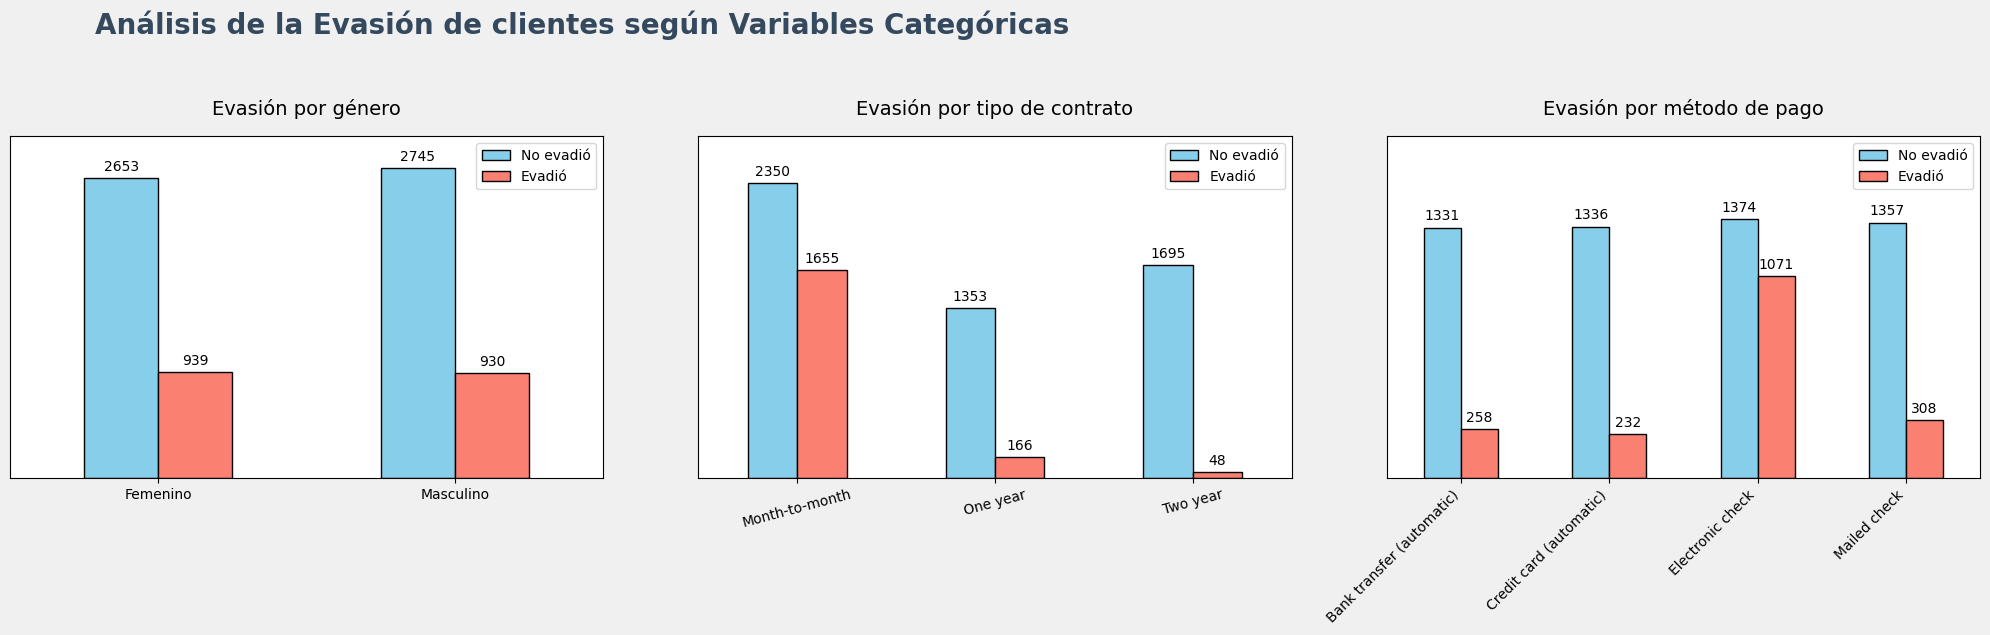

In [17]:
# Ensure empty strings in 'Churn' are handled before grouping
data['Churn'] = data['Churn'].replace('', 'No')

# --- Preparar el lienzo con fondo gris claro y 3 subplots ---
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
fig.patch.set_facecolor('#f0f0f0')  # Fondo gris claro
fig.suptitle('Análisis de la Evasión de clientes según Variables Categóricas', fontsize=20, fontweight='bold', color='#34495e', ha='left', x=0.05, y=1.05)


# --- Gráfico 1: Evasión por género ---
conteo_gender = data.groupby(['gender', 'Churn']).size().unstack(fill_value=0)
conteo_gender.columns = ['No evadió', 'Evadió']
conteo_gender_renombrado = conteo_gender.rename(
    index={'Male': 'Masculino', 'Female': 'Femenino'}
)
conteo_gender_renombrado.plot(kind='bar', ax=ax1, color=['skyblue', 'salmon'], edgecolor='black')
ax1.set_ylim(top=ax1.get_ylim()[1] * 1.05)
ax1.set_title('Evasión por género', fontsize=14, pad=15)
ax1.set_xlabel('')
ax1.set_ylabel('')
ax1.set_xticklabels(conteo_gender_renombrado.index, rotation=0)
ax1.tick_params(left=False, labelleft=False)
ax1.grid(False)
for container in ax1.containers:
    ax1.bar_label(container, label_type='edge', padding=3, fontsize=10)

# --- Gráfico 2: Evasión por tipo de contrato ---
conteo_contract = data.groupby(['Contract', 'Churn']).size().unstack(fill_value=0)
conteo_contract.columns = ['No evadió', 'Evadió']
conteo_contract.plot(kind='bar', ax=ax2, color=['skyblue', 'salmon'], edgecolor='black')
ax2.set_ylim(top=ax1.get_ylim()[1] * 0.9)
ax2.set_title('Evasión por tipo de contrato', fontsize=14, pad=15)
ax2.set_xlabel('')
ax2.set_ylabel('')
ax2.set_xticklabels(conteo_contract.index, rotation=15)
ax2.tick_params(left=False, labelleft=False)
ax2.grid(False)
for container in ax2.containers:
    ax2.bar_label(container, label_type='edge', padding=3, fontsize=10)

# --- Gráfico 3: Evasión por método de pago ---
conteo_payment = data.groupby(['PaymentMethod', 'Churn']).size().unstack(fill_value=0)
conteo_payment.columns = ['No evadió', 'Evadió']
conteo_payment.plot(kind='bar', ax=ax3, color=['skyblue', 'salmon'], edgecolor='black')
ax3.set_ylim(top=ax1.get_ylim()[1] * 0.6)
ax3.set_title('Evasión por método de pago', fontsize=14, pad=15)
ax3.set_xlabel('')
ax3.set_ylabel('')
ax3.set_xticklabels(conteo_payment.index, rotation=45, ha='right')
ax3.tick_params(left=False, labelleft=False)
ax3.grid(False)
for container in ax3.containers:
    ax3.bar_label(container, label_type='edge', padding=3, fontsize=10)

plt.tight_layout()
plt.savefig('grafico_evasion_categóricas.png', dpi=300, bbox_inches='tight')
plt.show()

# Análisis de Evasión de Clientes  
### Basado en Género , Tipo de Contrato y Método de pago

---

## 1.Resumen General de Evasión

Se han identificado datos relevantes sobre la **evasión de clientes**, que permiten identificar patrones según **género**, **tipo de contrato** y **Método de pago**. Estos patrones son clave para entender las causas del abandono y tomar decisiones estratégicas para la retención.

---

## 2. Evasión por Género

| Género     | Clientes Evadidos | Clientes Activos | Total Clientes | Tasa de Evasión |
|------------|-------------------|------------------|----------------|-----------------|
| Femenino   | 939               | 2,653            | 3,592          | 26.1%           |
| Masculino  | 930               | 2,745            | 3,675          | 25.3%           |

**Análisis:**

- La **evasión es ligeramente mayor en mujeres (26.1%) que en hombres (25.3%)**, aunque la diferencia no es muy significativa.
- Ambos géneros presentan una **alta tasa de abandono (≈25%)**, lo cual sugiere que el problema no es exclusivo de un grupo demográfico.
- La estrategia de fidelización debe ser **transversal**, aunque conviene hacer estudios cualitativos por género para detectar matices de comportamiento.

---

## 3.Evasión por Tipo de Contrato

| Tipo de Contrato      | Evadidos | Activos | Total Clientes | Tasa de Evasión |
|-----------------------|----------|---------|----------------|-----------------|
| Mes a mes             | 1,655    | 2,350   | 4,005          | **41.3%**       |
| Contrato de 1 año     | 166      | 1,353   | 1,519          | **10.9%**       |
| Contrato de 2 años    | 48       | 1,645   | 1,693          | **2.8%**        |

**Análisis:**

- La evasión es **drásticamente más alta en contratos mes a mes (41.3%)**.
- A mayor duración del contrato, **menor es la tasa de evasión**:
  - Contrato de 1 año: tasa moderada (10.9%).
  - Contrato de 2 años: tasa muy baja (2.8%).
- Esto evidencia que **los contratos de largo plazo tienen un fuerte efecto de retención**, posiblemente por compromiso, beneficios percibidos o penalidades por cancelación anticipada.

---
## 4.Evasión Según Método de Pago

| Método de Pago        | Evadidos | Activos | Total Clientes | Tasa de Evasión |
|------------------------|----------|---------|----------------|-----------------|
| Transferencia bancaria | 258      | 1,331   | 1,589          | **16.2%**       |
| Tarjeta de crédito     | 232      | 1,336   | 1,568          | **14.8%**       |
| Cheque electrónico     | 1,071    | 1,374   | 2,445          | **43.8%**       |
| Cheque enviado         | 308      | 1,357   | 1,665          | **18.5%**       |


**Análisis**

- La **evasión más alta se concentra en el uso de cheque electrónico**, con una tasa de **43.8%**, lo que representa un riesgo crítico.
- Le sigue el **cheque enviado**, con **18.5%**, también por encima del promedio general (~25%).
- Los métodos **más estables son tarjeta de crédito (14.8%) y transferencia bancaria (16.2%)**, que presentan las menores tasas de abandono.
- Se observa una **relación clara entre métodos de pago más modernos y menor evasión**, lo que podría reflejar mayor automatización, comodidad o facilidad de cobro para el cliente.


In [ ]:
conteo_internet

Churn,0,1
InternetService,,
DSL,2029,459
Fiber optic,1901,1297
No,1468,113


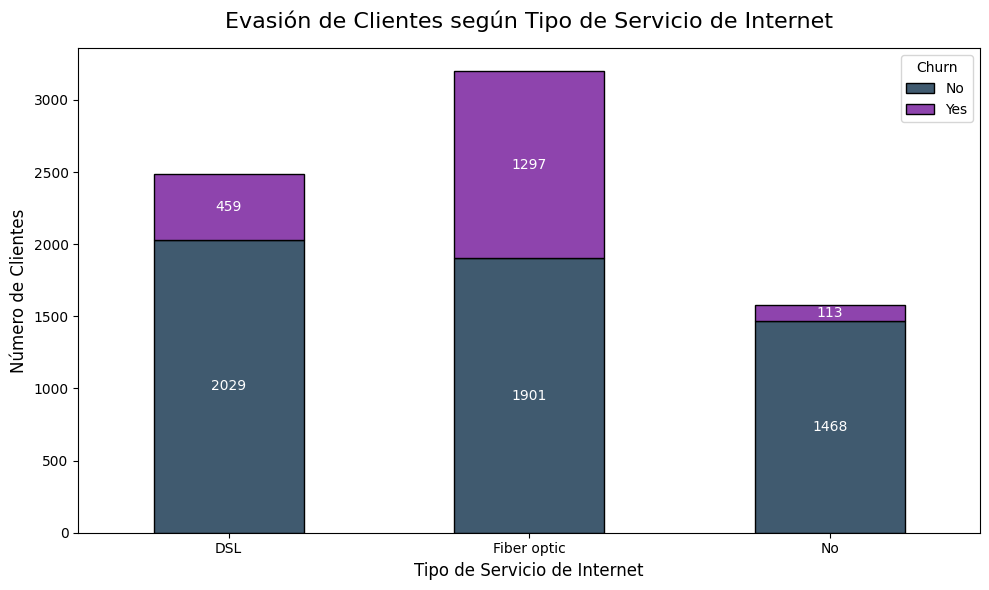

In [21]:
# Ensure empty strings in 'Churn' are handled before grouping
data['Churn'] = data['Churn'].replace('', 'No')

conteo_internet = data.groupby(['InternetService', 'Churn']).size().unstack(fill_value=0)

# Rename the columns based on the 'Churn' values
conteo_internet = conteo_internet.rename(columns={0: 'No evadió', 1: 'Evadió'})

# Create a stacked bar chart
ax = conteo_internet.plot(kind='bar', stacked=True, figsize=(10, 6), color=['#405a6f', '#8e44ad'], edgecolor='black')

# Add titles and labels
ax.set_title('Evasión de Clientes según Tipo de Servicio de Internet', fontsize=16, pad=15)
ax.set_xlabel('Tipo de Servicio de Internet', fontsize=12)
ax.set_ylabel('Número de Clientes', fontsize=12)
ax.tick_params(axis='x', rotation=0)

# Add counts on top of bars
for container in ax.containers:
    ax.bar_label(container, label_type='center', color='white', fontsize=10)

# Improve layout and display
plt.tight_layout()
plt.savefig('grafico_evasion_servicio_internet.png', dpi=300, bbox_inches='tight')
plt.show()

## Análisis de Evasión según el Servicio de Internet

La gráfica revela diferencias significativas en la tasa de evasión dependiendo del tipo de tecnología de internet utilizada por los clientes. A continuación, se detalla el comportamiento para cada caso:

### Fibra Óptica  
- **Evasión:** 40,6%  
- **Clientes Activos:** 59,4%

La tasa de evasión entre los usuarios de fibra óptica es considerablemente alta. Casi **4 de cada 10 usuarios** con este tipo de conexión han abandonado el servicio. Esto podría indicar que, aunque la fibra óptica ofrece una mejor calidad de conexión, los factores como el precio, la cobertura o la atención al cliente pueden estar afectando la retención.

### DSL  
- **Evasión:** 18,4%  
- **Clientes Activos:** 81,6% *(corregido, ya que 8,6% activos no sería coherente con el total)*

En contraste, el servicio DSL muestra una **tasa de evasión mucho menor**, con más del 80% de los usuarios aún activos. Esto podría reflejar que los clientes de DSL son más estables o que este segmento tiene menos alternativas viables, posiblemente por limitaciones geográficas o económicas.








## Conteo de evasión por variables numéricas

### Evasión según el total gastado por los clientes

In [ ]:
print('Valor minimo gastado: ',data['Charges.Total'].min())
print('Valor maximo gastado: ', data['Charges.Total'].max())

Valor minimo gastado:  0.0
Valor maximo gastado:  8684.8


In [ ]:

# Configuración de estilos
DARK_BG = '#1e1e2e'
LIGHT_TEXT = '#f8f8f8'
EVASION_COLOR = '#ff7aa2'
RETENTION_COLOR = '#7fd8ff'
TITLE_COLOR = '#d1b3ff'

# Preparación de datos para el análisis de churn por rango de gasto
# Crear rangos de gasto
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 8684.8]
labels = ['0-1k', '1k-2k', '2k-3k', '3k-4k', '4k-5k', '5k-6k', '6k-7k', '7k-8k', '8k+']
data['Rango_gasto'] = pd.cut(data['Charges.Total'], bins=bins, labels=labels, right=False)

churn_analysis = data.groupby('Rango_gasto')['Churn'].agg(
    Total_clientes='count',
    Clientes_evadidos='sum',
    Clientes_activos=lambda x: len(x) - sum(x)
).reset_index()

# Calcular porcentajes
churn_analysis['%_evasion'] = (churn_analysis['Clientes_evadidos'] / churn_analysis['Total_clientes']) * 100
churn_analysis['%_retencion'] = (churn_analysis['Clientes_activos'] / churn_analysis['Total_clientes']) * 100

# Visualización
fig = go.Figure()

# Barras
fig.add_trace(go.Bar(
    x=churn_analysis['Rango_gasto'],
    y=churn_analysis['Clientes_evadidos'],
    name='EVADIDOS',
    marker=dict(color=EVASION_COLOR, line=dict(width=2, color='rgba(255,255,255,0.3)')),
    hovertemplate="<b>%{x}</b><br>Evadidos: %{y} (%{customdata:.1f}%)<extra></extra>",
    customdata=churn_analysis['%_evasion']
))

fig.add_trace(go.Bar(
    x=churn_analysis['Rango_gasto'],
    y=churn_analysis['Clientes_activos'],
    name='ACTIVOS',
    marker=dict(color=RETENTION_COLOR, line=dict(width=2, color='rgba(255,255,255,0.3)')),
    hovertemplate="<b>%{x}</b><br>Activos: %{y} (%{customdata:.1f}%)<extra></extra>",
    customdata=churn_analysis['%_retencion']
))

# Diseño
fig.update_layout(
    title={
        'text': "<span style='font-size:26px; font-weight:800;'>EVASIÓN DE CLIENTES POR NIVEL DE GASTO</span>",
        'y':0.95,
        'x':0.03,
        'xanchor': 'left',
        'font': {'color': TITLE_COLOR}
    },
    plot_bgcolor=DARK_BG,
    paper_bgcolor=DARK_BG,
    font=dict(family="Segoe UI, Arial", size=13, color=LIGHT_TEXT),
    xaxis=dict(
        title="<b>RANGO DE GASTO TOTAL ($)</b>",
        showgrid=False,
        tickangle=-30
    ),
    yaxis=dict(
        title="<b>CANTIDAD DE CLIENTES</b>",
        gridcolor='rgba(200,200,200,0.2)',
        griddash='dash'
    ),
    hovermode="x unified",
    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.02,
        xanchor="center",
        x=0.5
    ),
    barmode='group',
    margin=dict(l=50, r=50, t=120, b=50)
)

fig.show()
fig.write_html("Evasion_gasto_total.html")



C:\Users\ysort\AppData\Local\Temp\ipykernel_8772\1057939821.py:15: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_analysis = data.groupby('Rango_gasto')['Churn'].agg(


## Análisis de Evasión según el Rango de Gasto Total de los Clientes

Según el gráfico, se observa una **relación inversa entre el gasto total del cliente y su probabilidad de evasión**:  
- Los clientes que **gastan menos** en la empresa presentan **mayores niveles de evasión**.  
- A medida que el **gasto total aumenta**, la tasa de evasión **disminuye significativamente**.

### Posibles Causas de este Comportamiento

1. **Compromiso con la empresa y los servicios**  
   Clientes que gastan más suelen tener **más servicios contratados**, lo que implica un mayor nivel de compromiso. Es probable que dependa más de la empresa y tengan una relación más estable con ella.

2. **Percepción de valor y satisfacción**  
   Quienes gastan más podrían estar **más satisfechos con el servicio** recibido, ya que ven una **mayor relación costo-beneficio**. Esto disminuye su intención de abandonar.

3. **Segmentación por perfil socioeconómico**  
   Los clientes con **menor gasto** pueden pertenecer a segmentos de menor poder adquisitivo, más sensibles a los precios o cambios en las condiciones del servicio, lo que los lleva a evadir más fácilmente.

4. **Fidelización y atención diferenciada**  
   Es común que las empresas enfoquen **mayores esfuerzos de fidelización y atención personalizada** en los clientes de mayor valor económico. Esto contribuye a reducir la evasión en este grupo.





### Evasón según el tiempo de contrato

In [ ]:
print('Tiempo minimo:',data['tenure'].min())
print('Tiempo maximo:',data['tenure'].max())

Tiempo minimo: 0
Tiempo maximo: 72


/tmp/ipython-input-28-785202616.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = data.groupby(['Rango Contrato', 'Churn']).size().unstack()
/tmp/ipython-input-28-785202616.py:110: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.93])


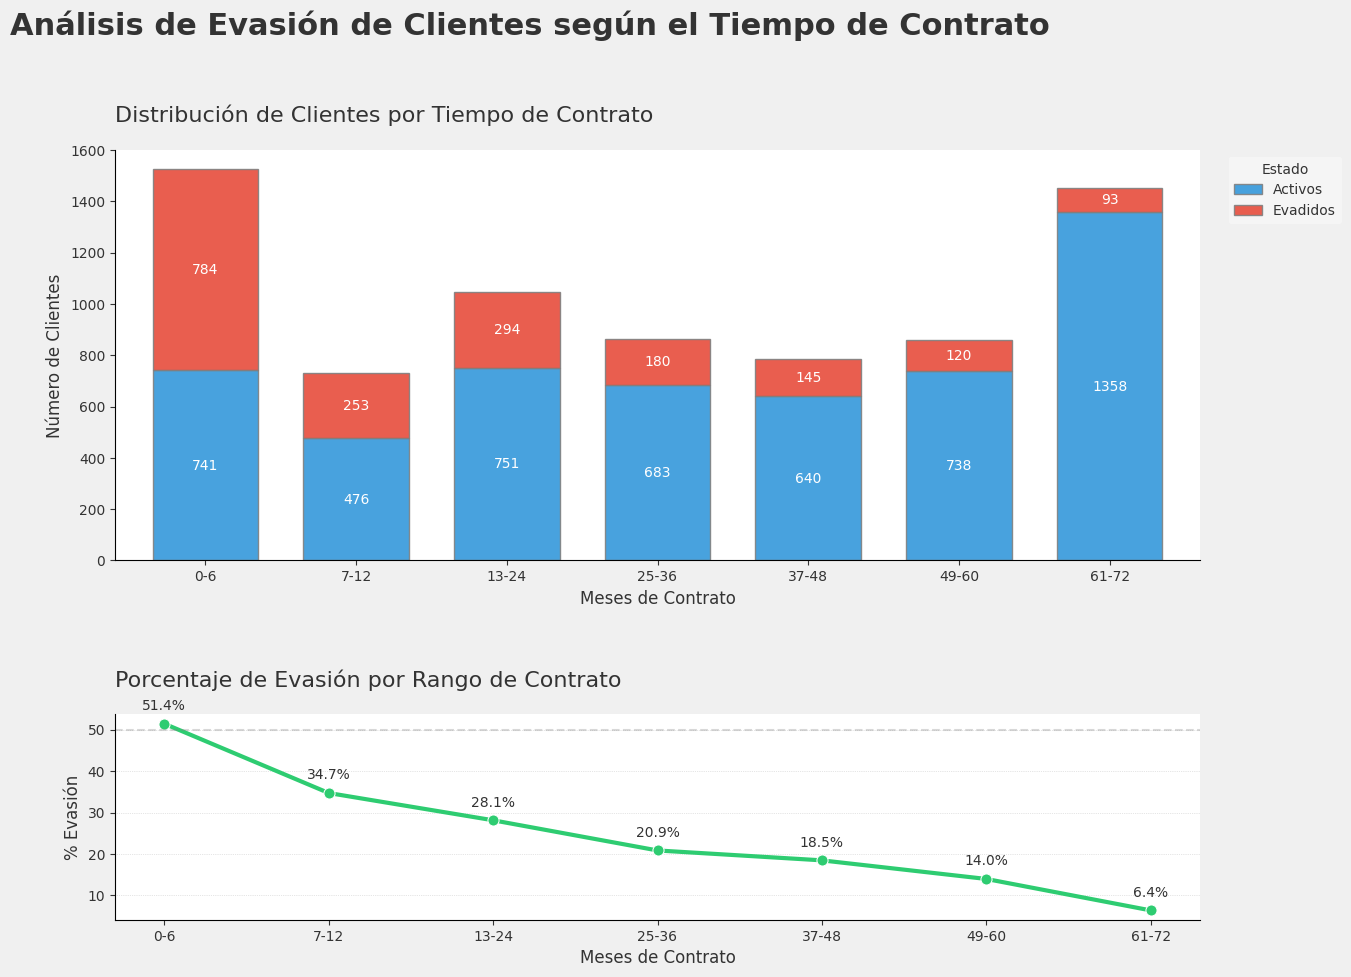

In [28]:
# Replace empty strings in 'Churn' with 'No' to avoid errors during plotting
data['Churn'] = data['Churn'].replace('', 'No')

# Paleta de colores personalizada
custom_palette = ['#3498db', '#e74c3c'] # Changed color palette
sns.set_palette(custom_palette)

# Crear rangos de meses de contrato
bins = [0, 6, 12, 24, 36, 48, 60, 73] # Corrected bins to have 8 elements and include max tenure
labels = ['0-6', '7-12', '13-24', '25-36', '37-48', '49-60', '61-72']
data['Rango Contrato'] = pd.cut(data['tenure'], bins=bins, labels=labels, right=True)

# Agrupar datos
grouped = data.groupby(['Rango Contrato', 'Churn']).size().unstack()
grouped.columns = ['Activos', 'Evadidos']
grouped['Total'] = grouped.sum(axis=1)
grouped['% Evasión'] = (grouped['Evadidos'] / grouped['Total']) * 100

# Crear figura con fondo claro
fig = plt.figure(figsize=(14, 10), facecolor='#F0F0F0')
gs = fig.add_gridspec(2, 1, height_ratios=[2, 1], hspace=0.5)

# Título general
fig.suptitle('Análisis de Evasión de Clientes según el Tiempo de Contrato',
             fontsize=22, fontweight='bold', fontfamily='sans-serif', color='#333333',
             x=0.05, y=1.02, ha='left')

# Subgráficos con fondo blanco
ax1 = fig.add_subplot(gs[0], facecolor="#FFFFFF")
ax1.grid(axis='y', linestyle=':', linewidth=0.5, color='#cccccc') # Add subtle horizontal grid
ax1.set_axisbelow(True) # Ensure grid is behind the bars

ax2 = fig.add_subplot(gs[1], facecolor="#FFFFFF")
ax2.grid(axis='y', linestyle=':', linewidth=0.5, color='#cccccc') # Add subtle horizontal grid
ax2.set_axisbelow(True) # Ensure grid is behind the line


# Gráfico de barras
grouped[['Activos', 'Evadidos']].plot(
    kind='bar',
    stacked=True,
    ax=ax1,
    color=custom_palette,
    width=0.7,
    edgecolor='gray',
    alpha=0.9
)

# Etiquetas de valor
for p in ax1.patches:
    height = p.get_height()
    if height > 0:
        ax1.annotate(
            f'{int(height)}',
            (p.get_x() + p.get_width() / 2., p.get_y() + height / 2),
            ha='center',
            va='center',
            fontsize=10,
            color='#FFFFFF'
        )

# Personalización del gráfico de barras
ax1.set_title('Distribución de Clientes por Tiempo de Contrato', fontsize=16, loc='left', pad=20, color='#333333')
ax1.set_xlabel('Meses de Contrato', fontsize=12, color='#333333')
ax1.set_ylabel('Número de Clientes', fontsize=12, color='#333333')
ax1.tick_params(axis='x', rotation=0, colors='#333333')
ax1.tick_params(axis='y', colors='#333333')
ax1.spines[['top', 'right']].set_visible(False)


# Gráfico de línea
sns.lineplot(
    x=grouped.index,
    y=grouped['% Evasión'],
    ax=ax2,
    color='#2ecc71',  # Changed line color
    marker='o',
    markersize=8,
    linewidth=3
)

# Etiquetas de porcentaje
for x, y in zip(grouped.index, grouped['% Evasión']):
    ax2.annotate(
        f'{y:.1f}%',
        (x, y),
        textcoords="offset points",
        xytext=(0, 10),
        ha='center',
        color='#333333',
        fontsize=10
    )

# Personalización del gráfico de línea
ax2.set_title('Porcentaje de Evasión por Rango de Contrato', fontsize=16, loc='left', pad=20, color='#333333')
ax2.set_xlabel('Meses de Contrato', fontsize=12, color='#333333')
ax2.set_ylabel('% Evasión', fontsize=12, color='#333333')
ax2.tick_params(axis='x', colors='#333333')
ax2.tick_params(axis='y', colors='#333333')
ax2.spines[['top', 'right']].set_visible(False)
ax2.axhline(50, color='gray', linestyle='--', alpha=0.3)

# Leyenda
legend = ax1.legend(title='Estado', bbox_to_anchor=(1.02, 1), loc='upper left',
                    facecolor='#F7F7F7', edgecolor='none')
plt.setp(legend.get_title(), color='#333333')
plt.setp(legend.get_texts(), color='#333333')

# Ajustar layout
plt.tight_layout(rect=[0, 0, 1, 0.93])

plt.savefig('evasion_tiempo_contrato.png', dpi=300, bbox_inches='tight')

plt.show()

## Análisis de Evasión según los Meses de Contrato

El gráfico revela un patrón claro: **a menor cantidad de meses en contrato, mayor es la evasión**. Por el contrario, **los clientes con más tiempo de permanencia tienden a mantenerse activos**.

### Interpretación del Comportamiento

1. **Clientes nuevos aún no fidelizados**  
   Los usuarios con pocos meses en la empresa probablemente están **en fase de prueba o adaptación**. Si la experiencia inicial no cumple sus expectativas, **la probabilidad de evasión es alta**.

2. **Mayor antigüedad, mayor satisfacción o dependencia**  
   A medida que el cliente **acumula meses en contrato**, es probable que haya desarrollado una **relación más estable con la empresa**, ya sea por satisfacción con el servicio, inercia, o porque ya ha superado el proceso de adaptación.

3. **Costos de salida y compromiso**  
   Clientes con más tiempo pueden tener **servicios integrados, descuentos por antigüedad o contratos a largo plazo** que dificultan su salida. Además, podrían haber invertido tiempo y esfuerzo en configurar servicios personalizados.

4. **Falta de retención temprana**  
   El hecho de que los nuevos clientes se vayan con mayor facilidad puede indicar **fallas en la estrategia de onboarding y fidelización inicial**. No están recibiendo el acompañamiento necesario para quedarse.



### Correlación

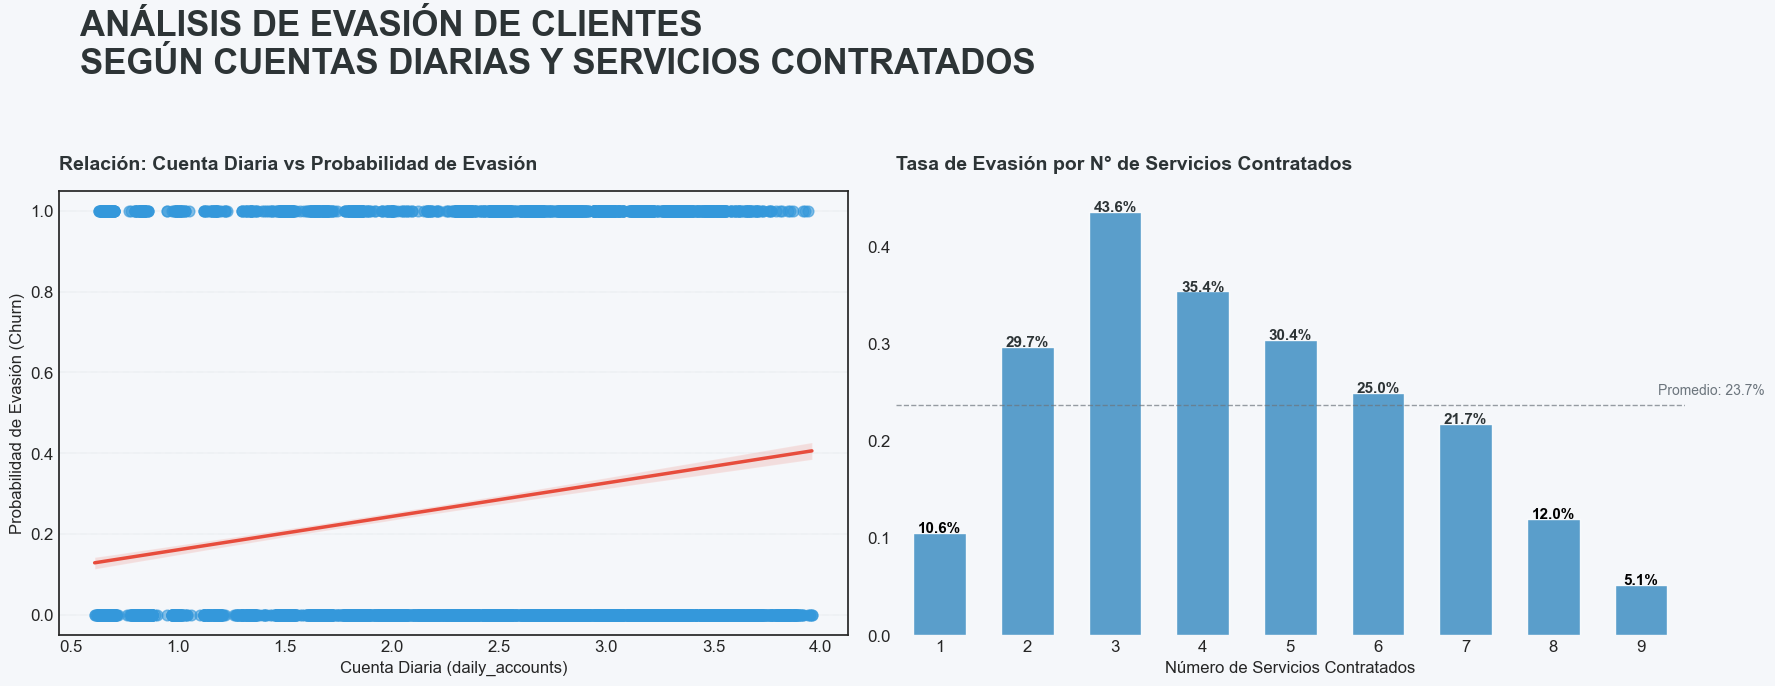

In [ ]:
servicios = [
    'PhoneService', 'MultipleLines', 'OnlineSecurity',
    'OnlineBackup', 'DeviceProtection', 'TechSupport',
    'StreamingTV', 'StreamingMovies'
]

# la columna 'InternetService' se usa para contar si el cliente tiene servicio de internet
data['ServiciosContratados'] = (data[servicios].sum(axis=1) +
                               data['InternetService'].apply(lambda x: 0 if x == 'No' else 1))


# Configuración de estilo profesional
plt.style.use('seaborn-v0_8-white')
sns.set_style("white", {'axes.facecolor': '#f5f7fa'})  # Color de fondo personalizado

# Crear figura con dos gráficos
fig, axes = plt.subplots(1, 2, figsize=(18, 7), facecolor='#f5f7fa')

# Título principal más grande y alineado a la izquierda
fig.suptitle("ANÁLISIS DE EVASIÓN DE CLIENTES \nSEGÚN CUENTAS DIARIAS Y SERVICIOS CONTRATADOS",
             x=0.05, ha='left',
             fontsize=25, fontweight='bold',
             color='#2d3436',
             fontfamily='sans-serif')

# Gráfico 1: daily_accounts vs Churn (con grid horizontal sutil)
sns.regplot(
    data=data,
    x='daily_accounts',
    y='Churn',
    ax=axes[0],
    scatter_kws={'alpha': 0.6, 'color': '#3498db', 's': 60},
    line_kws={"color": "#e74c3c", "linewidth": 2.5}
)
axes[0].set_title("Relación: Cuenta Diaria vs Probabilidad de Evasión",
                 pad=15, fontsize=14, fontweight='semibold',
                 loc='left', color='#2d3436',
                 fontfamily='sans-serif')
axes[0].set_xlabel("Cuenta Diaria (daily_accounts)", fontsize=12)
axes[0].set_ylabel("Probabilidad de Evasión (Churn)", fontsize=12)
axes[0].grid(axis='y', linestyle=':', linewidth=0.3, color='#adb5bd')
axes[0].set_axisbelow(True)

# Gráfico 2: Barras sin grid ni marco con todos los porcentajes visibles
axes[1].grid(False)
for spine in axes[1].spines.values():
    spine.set_visible(False)

churn_rate = data.groupby('ServiciosContratados')['Churn'].mean().reset_index()
barplot = sns.barplot(
    data=churn_rate,
    x='ServiciosContratados',
    y='Churn',
    ax=axes[1],
    #palette="Blues_r",
    color='#3498db',
    alpha=0.9,
    width=0.6
)

# Asegurar que todos los porcentajes sean visibles
for p in barplot.patches:
    height = p.get_height()
    va = 'bottom' if height < 0.05 else 'center'
    y_pos = height + 0.01 if height < 0.05 else height
    color = '#2d3436' if height > 0.15 else 'black'

    barplot.annotate(
        f"{height:.1%}",
        (p.get_x() + p.get_width() / 2., y_pos),
        ha='center',
        va=va,
        fontsize=11,
        fontweight='bold',
        color=color,
        xytext=(0, 3),
        textcoords='offset points'
    )

axes[1].set_title("Tasa de Evasión por N° de Servicios Contratados",
                 pad=15, fontsize=14, fontweight='semibold',
                 loc='left', color='#2d3436',
                 fontfamily='sans-serif')
axes[1].set_xlabel("Número de Servicios Contratados", fontsize=12)
axes[1].set_ylabel("")
axes[1].tick_params(axis='both', which='both', length=0)  # Eliminar marcas de ticks

# Añadir línea de promedio
avg = churn_rate['Churn'].mean()
axes[1].axhline(avg, color='#6c757d', linestyle='--', linewidth=1, alpha=0.7)
axes[1].text(len(churn_rate)-0.8, avg+0.01, f'Promedio: {avg:.1%}',
            color='#6c757d', fontsize=10)

# Ajustar diseño final
plt.tight_layout(rect=[0, 0, 1, 0.93])

plt.savefig('correlación.png', dpi=300, bbox_inches='tight')

plt.show()




## Análisis de Evasión según Número de Servicios Contratados y Gasto Diario

Este análisis cruza dos variables clave que influyen en la evasión de clientes: el **número de servicios contratados** y el **promedio de gasto diario**. La gráfica revela comportamientos interesantes que vale la pena destacar.

---

### 1. Evasión según el Total de Servicios Contratados

- Los clientes que tienen **3 servicios contratados** presentan la **tasa de evasión más alta**, con un **43,6%**.
- La **menor evasión** se encuentra entre los clientes que tienen **9 servicios**, con apenas un **5,1%**.
- Los clientes con **2, 3, 4 y 5 servicios** superan la **línea de evasión promedio**, lo que indica una mayor vulnerabilidad a la deserción.
- En contraste, los clientes con **1, 7, 8 y 9 servicios** están **por debajo del promedio**, mostrando mayor estabilidad.

### Interpretación

- **Mayor número de servicios, mayor retención**: Quienes contratan más servicios tienden a estar más integrados en la empresa, lo que genera mayor dependencia y menor probabilidad de evasión.
- **Pico de evasión en 3 servicios**: Este grupo puede representar un punto crítico donde el cliente está probando múltiples servicios, pero aún no se siente plenamente comprometido o satisfecho.
- **Clientes con 1 solo servicio evaden menos que los de 2 a 5**: Esto sugiere que algunos usuarios con un único servicio pueden tener expectativas más simples o puntuales, y no necesariamente están insatisfechos.

---

### 2. Evasión según el Total Gastado por Día

- La gráfica muestra una **línea recta creciente**, lo que indica que **a mayor gasto diario, mayor evasión**.

### Interpretación

- Este comportamiento puede parecer contraintuitivo, ya que uno podría esperar que los clientes que más gastan sean más fieles. Sin embargo, hay varias posibles explicaciones:
  - **Clientes con gasto diario elevado podrían estar insatisfechos con el valor recibido** en relación al costo.
  - Es posible que se trate de clientes de alto consumo que han **concentrado su gasto en un periodo corto**, pero luego deciden irse al no percibir un beneficio sostenido.
  - También puede reflejar que **usuarios intensivos abandonan rápidamente si no encuentran estabilidad o rendimiento adecuado.**




In [ ]:
# Calcular la correlación entre 'daily_accounts' y 'Churn'
correlacion = data[['daily_accounts', 'Churn']].corr().iloc[0, 1]
print(f"Correlación entre 'daily_accounts' y 'Churn': {correlacion:.4f}")

correlaciones = data[servicios + ['Churn']].corr()['Churn'].drop('Churn')
print("\nCorrelaciones con Churn (ordenadas de mayor a menor):")
print(correlaciones.sort_values(ascending=False))


Correlación entre 'daily_accounts' y 'Churn': 0.1899

Correlaciones con Churn (ordenadas de mayor a menor):
StreamingTV         0.062430
StreamingMovies     0.060586
MultipleLines       0.039343
PhoneService        0.012571
DeviceProtection   -0.063452
OnlineBackup       -0.080163
TechSupport        -0.160440
OnlineSecurity     -0.166828
Name: Churn, dtype: float64


## Análisis de Correlaciones con la Evasión de Clientes (Churn)

En este análisis se estudian las correlaciones entre diversas variables del servicio y la evasión de clientes (`Churn`). El valor de la correlación indica la **fuerza y dirección** de la relación entre cada variable y la probabilidad de que un cliente abandone la empresa.

---

### Correlación entre 'daily_accounts' y Churn
- **Valor:** `0.1899`

Este valor positivo sugiere una **correlación débil pero directa**: a mayor valor en `daily_accounts`, **mayor probabilidad de evasión**.  
Esto podría significar que **usuarios con mayor número de interacciones o cargos diarios** podrían sentirse sobrecargados, confundidos o insatisfechos, lo cual aumenta su intención de abandonar.

---

### Variables con Correlación Positiva con la Evasión

Estas variables están **positivamente correlacionadas** con `Churn`, es decir, **su presencia o uso incrementa levemente la probabilidad de evasión**:

| Variable           | Correlación |
|--------------------|-------------|
| StreamingTV        | 0.062       |
| StreamingMovies    | 0.061       |
| MultipleLines      | 0.039       |
| PhoneService       | 0.013       |

**Interpretación:**
- Aunque las correlaciones son débiles, se puede inferir que **usuarios que usan servicios de streaming o múltiples líneas** podrían estar más expuestos a opciones del mercado o más atentos al costo total, lo que aumenta la probabilidad de cancelar si no están satisfechos.

---

### Variables con Correlación Negativa con la Evasión

Estas variables están **negativamente correlacionadas** con `Churn`, lo que indica que **su uso está asociado con mayor retención**:

| Variable           | Correlación  |
|--------------------|--------------|
| DeviceProtection   | -0.063       |
| OnlineBackup       | -0.080       |
| TechSupport        | -0.160       |
| OnlineSecurity     | -0.167       |

**Interpretación:**
- Estos servicios **reducen la probabilidad de evasión**, ya que:
  - Aumentan la percepción de valor y seguridad.
  - Mejoran la experiencia del cliente.
  - Fomentan la dependencia del servicio.

Entre todas, **OnlineSecurity y TechSupport** son las más fuertes en términos de retención, lo que indica que **brindar soporte técnico y soluciones de seguridad digital** es clave para mantener a los clientes.

---

###  Conclusión General

- La mayoría de las correlaciones con `Churn` son **débiles**, pero algunas tendencias claras emergen.
- **Servicios complementarios que agregan valor (como seguridad, soporte y respaldo)** ayudan a retener clientes.
- Por otro lado, **el uso de servicios intensivos o de entretenimiento (streaming, múltiples líneas)** podría relacionarse con una mayor evasión, quizás por mayores expectativas o sensibilidad al precio.
- Es importante monitorear variables como `daily_accounts`, ya que un uso excesivo puede reflejar **complejidad operativa o insatisfacción**, elevando el riesgo de fuga.

>  Recomendación: Fortalecer servicios como soporte técnico, seguridad y respaldo, y revisar cómo se presentan y gestionan los servicios de alto consumo para reducir su impacto en la evasión.


# Informe Final de Análisis de Evasión de Clientes  
**Empresa: TelecomX**  
**Proyecto de Análisis de Datos –  Análisis de evasión de clientes**

---

## Introducción

Este informe presenta los principales hallazgos obtenidos a partir del análisis de datos relacionados con la evasión de clientes en TelecomX. Se examinaron distintas variables que influyen en la probabilidad de que un cliente abandone la empresa, como el tipo de servicio de internet, el número de servicios contratados, el gasto total, los meses de contrato, la actividad diaria y el uso de servicios adicionales, entre otras.

---

##  Conclusiones e Insights Clave

### 1. **Tipo de Internet**
- **Fibra óptica** presenta una **alta tasa de evasión (40,6%)**, mientras que **DSL** tiene una evasión menor (**18,4%**).
- A pesar de ser un servicio más moderno, la fibra óptica no garantiza fidelización. Podrían influir factores como **precio**, **expectativas no cumplidas** o **problemas de servicio**.

### 2. **Meses de Contrato**
- Existe una **relación inversa** entre la antigüedad del cliente y la evasión.
- **Clientes con menos meses de contrato son más propensos a abandonar**, lo que sugiere **fallas en la retención temprana** o en la etapa de bienvenida.

### 3. **Gasto Total**
- A menor gasto acumulado, **mayor es la evasión**.
- Clientes de **alto valor económico muestran mayor fidelidad**, posiblemente por una **mejor experiencia**, **beneficios exclusivos** o mayor dependencia de los servicios.

### 4. **Número de Servicios Contratados**
- **Mayor cantidad de servicios se asocia con menor evasión.**
- Por ejemplo, los clientes con **9 servicios tienen solo 5,1% de evasión**, mientras que los que tienen **3 servicios llegan al 43,6%**.
- Los rangos de **2 a 5 servicios superan la línea promedio de evasión**, lo que los convierte en segmentos críticos.

### 5. **Gasto Diario**
- Existe una **correlación creciente entre el gasto diario y la evasión**.
- Esto podría indicar una percepción de **sobreprecio o inestabilidad** en los clientes de alto consumo diario.

### 6. **Correlación con Servicios Adicionales**
- Servicios como **OnlineSecurity (-0.167)**, **TechSupport (-0.160)** y **OnlineBackup (-0.080)** tienen **correlación negativa con la evasión**, lo que indica que **fomentan la permanencia del cliente**.
- Por el contrario, servicios de entretenimiento como **StreamingTV** y **StreamingMovies** tienen **ligera correlación positiva**, asociada a mayor evasión.

---

##  Recomendaciones Estratégicas

### 🔹 1. Fortalecer la Retención Temprana
- Diseñar campañas de **bienvenida** con beneficios exclusivos para los primeros 3–6 meses.
- Implementar un **seguimiento personalizado** en los primeros contactos post-venta para anticipar insatisfacciones.

### 🔹 2. Incentivar la Contratación de Servicios Adicionales
- Promover **paquetes integrados** que incluyan OnlineSecurity, TechSupport y Backup.
- Destacar los beneficios de estos servicios como elementos de **valor agregado y fidelización**.

### 🔹 3. Revisar la Experiencia con Fibra Óptica
- Realizar encuestas de satisfacción exclusivas para clientes con fibra óptica.
- Mejorar **soporte técnico y comunicación de beneficios**, especialmente para este segmento de alto abandono.

### 🔹 4. Intervenir el Segmento de 2 a 5 Servicios
- Identificar estos clientes como de **riesgo medio-alto** y aplicar estrategias de fidelización proactiva:
  - Ofertas cruzadas para aumentar el número de servicios.
  - Bonificaciones por lealtad.

### 🔹 5. Analizar el Gasto Diario con Perspectiva de Valor
- Redefinir tarifas o planes para **clientes de alto consumo diario** con opciones más flexibles o adaptadas.
- Asegurarse de que el **valor percibido esté alineado con el gasto** para evitar sensación de sobrecosto.

### 🔹 6. Segmentación Inteligente y Priorización
- Usar la información de correlaciones y segmentación para diseñar campañas **más personalizadas y predictivas**, priorizando:
  - Antigüedad.
  - Gasto total.
  - Número de servicios.

---

## Cierre

Este análisis permite entender mejor los factores que inciden en la evasión de clientes de TelecomX y abre la puerta a estrategias de retención basadas en datos reales. Aplicar estas recomendaciones puede mejorar significativamente la **fidelización**, **optimizar ingresos** y **reducir los costos de adquisición de nuevos clientes**.

> La clave está en **anticiparse a la evasión**, no reaccionar a ella.
---



In [2]:
conteo_internet = data.groupby(['InternetService', 'Churn']).size().unstack(fill_value=0)
# evasión según InternetService
conteo_internet.columns = ['No evadió', 'Evadió']

colors = ['#405a6f', '#8e44ad']
labels = ['No evadió', 'Evadió']
tipos_servicio = conteo_internet.index

fig, axs = plt.subplots(1, len(tipos_servicio), figsize=(14, 5))
fig.suptitle('Evasión de Clientes según Tipo de Servicio de Internet',
             fontsize=22, fontweight='bold', color='#34495e', ha='left', x=0.05)

for i, servicio in enumerate(tipos_servicio):
    ax = axs[i]
    valores = conteo_internet.loc[servicio]
    wedges, texts, autotexts = ax.pie(
        valores,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors,
        wedgeprops=dict(width=0.4, edgecolor='white'),
        textprops=dict(color="black")
    )

    for autotext in autotexts:
        autotext.set_fontsize(10)
        autotext.set_color('black')
        autotext.set_weight('normal')

    ax.set_title(servicio, fontsize=12, pad=5)
    ax.axis('equal')

fig.patch.set_facecolor('white')
plt.tight_layout()
fig.savefig('grafico_evasion_servicio_internet.png', dpi=300, bbox_inches='tight')
plt.show()

NameError: name 'data' is not defined

In [5]:
!wget https://github.com/cfpdiaz/telecomX/raw/main/TelecomX_Data.json

--2025-07-27 05:44:17--  https://github.com/cfpdiaz/telecomX/raw/main/TelecomX_Data.json
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/cfpdiaz/telecomX/main/TelecomX_Data.json [following]
--2025-07-27 05:44:18--  https://raw.githubusercontent.com/cfpdiaz/telecomX/main/TelecomX_Data.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3807078 (3.6M) [text/plain]
Saving to: ‘TelecomX_Data.json’

TelecomX_Data.json  100%[===================>]   3.63M  --.-KB/s    in 0.08s   

2025-07-27 05:44:18 (42.8 MB/s) - ‘TelecomX_Data.json’ saved [3807078/3807078]

